In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# Membaca Data
data = pd.read_csv('final_project/Sari_Rasa_Araya.csv', sep=';')
print(data.to_string(index=False))

                          nama makanan  kategori   harga  01/11/2024  02/11/2024  03/11/2024  04/11/2024  05/11/2024  06/11/2024  07/11/2024  07/11/2024.1  09/11/2024  10/11/2024  11/11/2024  12/11/2024  13/11/2024  14/11/2024  15/11/2024  16/11/2024  17/11/2024  18/11/2024  19/11/2024  20/11/2024  21/11/2024  22/11/2024  23/11/2024  24/11/2024  25/11/2024  26/11/2024  27/11/2024  28/11/2024  29/11/2024  30/11/2024  rata-rata penjualan per bulan  01/01/1900  02/12/2024  03/12/2024  04/12/2024  05/12/2024  06/12/2024  rata-rata penjualan per bulan.1
                           nasi goreng      nasi 33000.0           8           5           4          11           8           6           7             5           8           5          10          11           4           4           7           5           5           6           9           3           7           4          12           7           5          13           8          11           7          10                           

In [ ]:
# Memastikan datanya ada
if 'nama makanan' not in data.columns or 'rata-rata penjualan per bulan' not in data.columns: # Changed 'df' to 'data'
    raise ValueError("Kolom 'Fnama makanan' atau 'rata-rata penjualan per bulan' tidak ditemukan dalam dataset")

# Menghitung 10 makanan terlaris
# kelompokka data berdasarkan nama makanan dan rata rata penjualan per bulan
top_foods = data.groupby('nama makanan')['rata-rata penjualan per bulan'].sum().sort_values(ascending=False).head(10) # Changed 'df' to 'data'

# Menampilkan hasil
print("10 Makanan Terlaris:")
print(top_foods)

10 Makanan Terlaris:
nama makanan
total penjualan per hari    2202000
nasi goreng                       7
ayam goreng mentega               4
capjay goreng                     3
fuyunghai kepiting                3
koloke                            3
mie goreng                        3
tamie capjay                      2
nasi goreng seafood               2
nasi goreng mawut                 2
Name: rata-rata penjualan per bulan, dtype: int64


<ipython-input-17-e2753e1f44ea>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=top_foods.values, y=top_foods.index, palette="viridis")


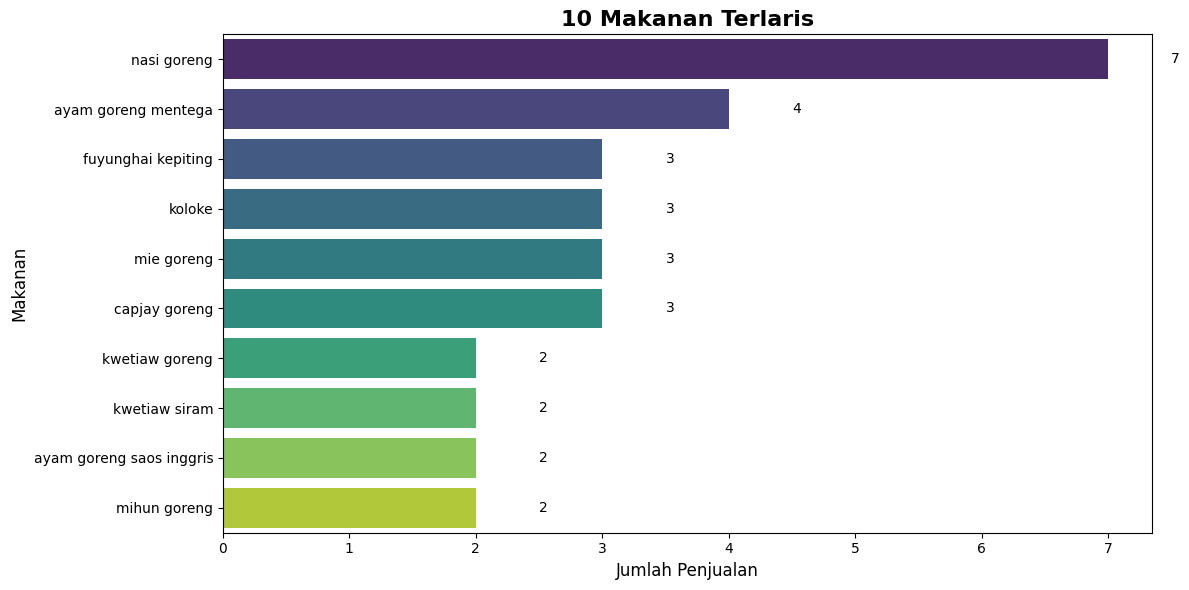

In [ ]:
# Menghitung 10 makanan terlaris
top_foods = data.groupby('nama makanan')['rata-rata penjualan per bulan'].sum().sort_values(ascending=False).head(10)

# Membuat visualisasi
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=top_foods.values, y=top_foods.index, palette="viridis")

# Menambahkan nilai di atas setiap batang
for i, value in enumerate(top_foods.values):
    plt.text(value + 0.5, i, f"{value:.0f}", va='center', fontsize=10)

# Menambahkan judul dan label
plt.title("10 Makanan Terlaris", fontsize=16, fontweight='bold')
plt.xlabel("Jumlah Penjualan", fontsize=12)
plt.ylabel("Makanan", fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
# Pembersihan Data
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [ ]:
# Define x and y
X = data['nama makanan']  # Changed 'x' to 'X'
y = data['kategori']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer()  # Membuat objek vektorizer TF-IDF
X_train = vectorizer.fit_transform(X_train)  # Sesuaikan dan ubah the training data
X_test = vectorizer.transform(X_test)  # mengubah testing data

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Naive Bayes Report:
               precision    recall  f1-score   support

        ayam       0.00      0.00      0.00         0
     kwetiau       1.00      1.00      1.00         1
         mie       0.00      0.00      0.00         1
        nasi       1.00      1.00      1.00         2
       udang       0.00      0.00      0.00         1

    accuracy                           0.60         5
   macro avg       0.40      0.40      0.40         5
weighted avg       0.60      0.60      0.60         5

SVM Report:
               precision    recall  f1-score   support

        ayam       0.00      0.00      0.00         0
     kwetiau       1.00      1.00      1.00         1
         mie       1.00      1.00      1.00         1
        nasi       1.00      1.00      1.00         2
       udang       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.60      0.60      0.60         5
weighted avg       0.80      0.80      0.80

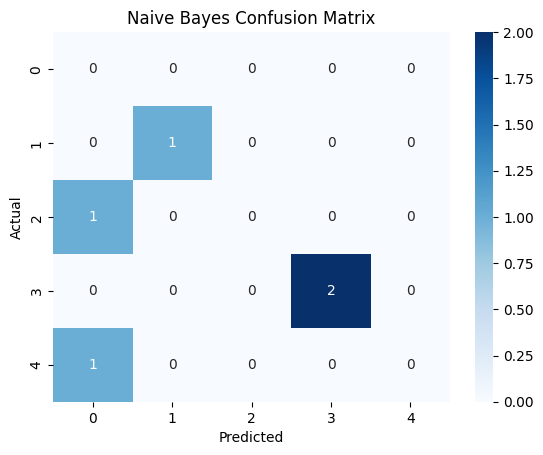

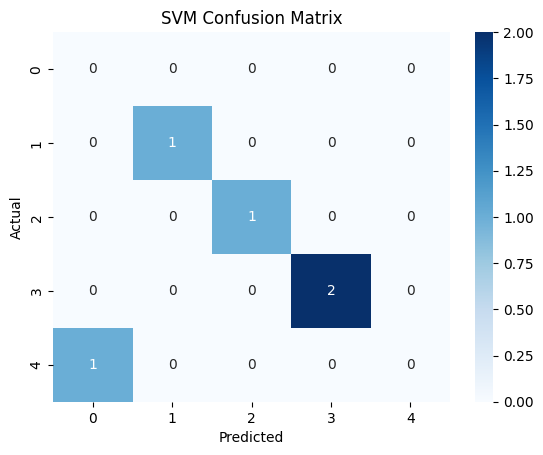

In [ ]:
# Model Training dan Evaluasi
# Model 1: Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

# Model 2: SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Evaluasi Model
print("Naive Bayes Report:\n", classification_report(y_test, nb_pred))
print("SVM Report:\n", classification_report(y_test, svm_pred))

# Visualisasi Hasil
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{title} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_conf_matrix(y_test, nb_pred, "Naive Bayes")
plot_conf_matrix(y_test, svm_pred, "SVM")